In [1]:
import os
import time
import tensorflow as tf
from tensorflow import keras
import numpy as np
from ResNet import ResidualUnit
from Inception import InceptionUnit
from Xception import XceptionUnit

In [2]:
model_resnet = keras.models.Sequential()
model_resnet.add(keras.layers.Conv2D(4, 7, strides = 2, input_shape = [224, 224, 1], padding = "same", use_bias = False))
model_resnet.add(keras.layers.BatchNormalization())
model_resnet.add(keras.layers.Activation("relu"))
model_resnet.add(keras.layers.MaxPool2D(pool_size=3, strides=2, padding = "same"))
prev_filters = 4
for filters in [8]:
    strides = 1 if filters == prev_filters else 2
    model_resnet.add(ResidualUnit(filters, strides = strides))
    prev_filters = filters
# model_resnet.add(keras.layers.GlobalAveragePooling2D())
model_resnet.add(keras.layers.Flatten())
model_resnet.add(keras.layers.Dropout(0.5))
# model_resnet.add(keras.layers.Dense(10, activation = "relu"))
model_resnet.add(keras.layers.Dense(2, activation = "softmax"))

In [24]:
model_resnet.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 112, 112, 4)       196       
                                                                 
 batch_normalization (BatchN  (None, 112, 112, 4)      16        
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 112, 112, 4)       0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 56, 56, 4)        0         
 )                                                               
                                                                 
 residual_unit (ResidualUnit  (None, 28, 28, 8)        992       
 )                                                               
                                                        

In [3]:
model_googlenet = keras.models.Sequential()
model_googlenet.add(keras.layers.Conv2D(64, 7, strides = 2, input_shape = [224, 224, 1], padding = "same", use_bias = False))
model_googlenet.add(keras.layers.BatchNormalization())
model_googlenet.add(keras.layers.Activation("relu"))
model_googlenet.add(keras.layers.MaxPool2D(pool_size=3, strides=2, padding = "same"))
model_googlenet.add(InceptionUnit())
model_googlenet.add(keras.layers.GlobalAveragePooling2D())
model_googlenet.add(keras.layers.Flatten())
model_googlenet.add(keras.layers.Dense(10, activation = "relu"))
model_googlenet.add(keras.layers.Dense(2, activation = "sigmoid"))

In [4]:
model_xception = keras.models.Sequential()
model_xception.add(keras.layers.Conv2D(8, 7, strides = 2, input_shape = [224, 224, 1], padding = "same", use_bias = False))
model_xception.add(keras.layers.BatchNormalization())
model_xception.add(keras.layers.Activation("relu"))
model_xception.add(XceptionUnit(8, isEntryExit=True))
model_xception.add(XceptionUnit(16))
model_xception.add(XceptionUnit(16))
model_xception.add(XceptionUnit(8, isEntryExit=True))
model_xception.add(keras.layers.SeparableConv2D(8, 3, padding = "same"))
model_xception.add(keras.layers.BatchNormalization())
model_xception.add(keras.layers.Activation("relu"))
model_xception.add(keras.layers.Flatten())
model_xception.add(keras.layers.Dense(10, activation = "relu"))
model_xception.add(keras.layers.Dense(2, activation = "softmax"))

In [5]:
img_height = 224
img_weight = 224
batch_size = 16

In [6]:
ds_train = keras.utils.image_dataset_from_directory(
    "D:\Programming\Python\Tender-Notice-Extraction\Datasets",
    labels = 'inferred',
    label_mode = "categorical",
    color_mode = "grayscale",
    batch_size = batch_size,
    image_size = (img_height, img_weight),
    shuffle = True,
    seed = 123,
    validation_split = 0.20,
    subset = "training",
    crop_to_aspect_ratio = True,
)

Found 16191 files belonging to 2 classes.
Using 12953 files for training.


In [7]:
ds_valid = keras.utils.image_dataset_from_directory(
    "D:\Programming\Python\Tender-Notice-Extraction\Datasets",
    labels = 'inferred',
    label_mode = "categorical",
    color_mode = "grayscale",
    batch_size = batch_size,
    image_size = (img_height, img_weight),
    shuffle = True,
    seed = 123,
    validation_split = 0.20,
    subset = "validation",
    crop_to_aspect_ratio = True,
)

Found 16191 files belonging to 2 classes.
Using 3238 files for validation.


In [8]:
class_names = ds_train.class_names
print(class_names)

['0', '1']


tf.Tensor(
[[0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]], shape=(16, 2), dtype=float32)
(224, 224, 1)
(224, 224, 1)
(224, 224, 1)
(224, 224, 1)
(224, 224, 1)
(224, 224, 1)
(224, 224, 1)
(224, 224, 1)
(224, 224, 1)


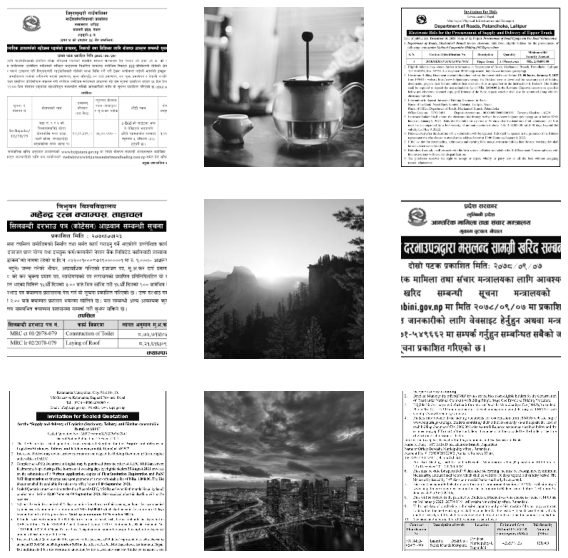

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
ds_take = ds_train.take(1)
for images, labels in ds_take:
  print(labels)
  # img = np.resize(images[0], (224, 224))
  
  # plt.imshow(img, cmap="gray")
  # break
  for i in range(9):
    print(images[i].shape)
    ax = plt.subplot(3, 3, i + 1)
    # plt.imshow(images[i].numpy().astype("uint8"))
    plt.imshow(images[i], cmap="gray")
    # plt.title(class_names[labels[i]])
    plt.axis("off")

In [10]:
for image_batch, labels_batch in ds_train:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(16, 224, 224, 1)
(16, 2)


In [11]:
# normalization_layer = tf.keras.layers.Rescaling(1./255)

In [12]:
# ds_train = ds_train.map(lambda x, y: (normalization_layer(x), y))
# image_batch_train, labels_batch_train = next(iter(ds_train))
# first_image = image_batch_train[0]
# # Notice the pixel values are now in `[0,1]`.
# print(np.min(first_image), np.max(first_image))

In [13]:
# ds_valid = ds_valid.map(lambda x, y: (normalization_layer(x), y))
# image_batch_valid, labels_batch_valid = next(iter(ds_valid))
# first_image = image_batch_valid[0]
# # Notice the pixel values are now in `[0,1]`.
# print(np.min(first_image), np.max(first_image))

In [14]:
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

In [15]:
ds_train = ds_train.map(process)
ds_valid = ds_valid.map(process)

tf.Tensor(
[[1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]], shape=(16, 2), dtype=float32)


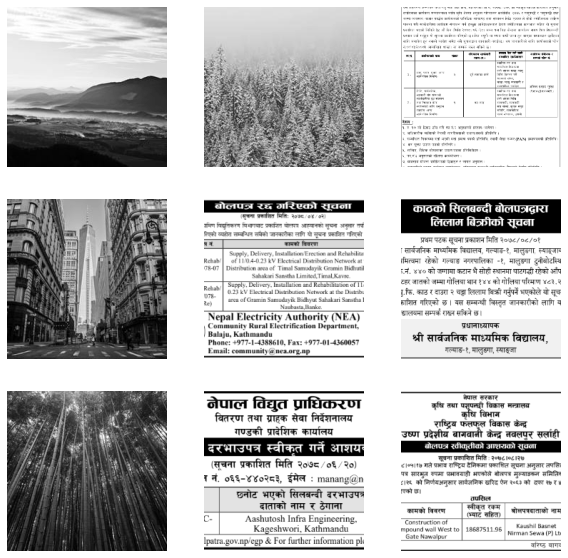

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in ds_train.take(1):
  print(labels)
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i], cmap="gray")
    # plt.title(class_names[labels[i]])
    plt.axis("off")

In [17]:
# NAME = "tender-cnn1-{}".format(int(time.time()))
# tensorboard = keras.callbacks.TensorBoard(log_dir=f"logs/Xception{NAME}", histogram_freq=0, write_graph=True, write_images=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
# checkpoint_cb = keras.callbacks.ModelCheckpoint(f"models/Xception{NAME}.h5", save_best_only=True)

In [22]:

optimizer = keras.optimizers.SGD(learning_rate=0.01, momentum=0.9, decay=0.001)
model_resnet.compile(loss=tf.keras.losses.CategoricalCrossentropy(), optimizer=optimizer, metrics=["accuracy"])

In [23]:
history = model_resnet.fit(ds_train,
                    epochs=2,
                    validation_data=ds_valid,
                    callbacks=[early_stopping_cb])                    
                   

Epoch 1/2
810/810 [==============================] - 13s 14ms/step - loss: 0.2074 - accuracy: 0.9775 - val_loss: 0.0119 - val_accuracy: 0.9951
Epoch 2/2
810/810 [==============================] - 11s 14ms/step - loss: 0.0268 - accuracy: 0.9932 - val_loss: 0.0482 - val_accuracy: 0.9861


In [ ]:
img1 = tf.keras.utils.load_img("notice3.jpg", grayscale=False, color_mode="grayscale", target_size=(224, 224,1))
img2 = tf.keras.utils.load_img("image6.png", grayscale=False, color_mode='grayscale', target_size=(224, 224,1))

In [ ]:
img1 = keras.utils.img_to_array(img1)
img2 = keras.utils.img_to_array(img2)

In [ ]:
# img1 = np.expand_dims(img1, axis=0)
# img2 = np.expand_dims(img2, axis=0)
img1.shape

In [ ]:
model_resnet.predict([img2])